In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
from plotnine import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('final.csv', encoding='utf-8', low_memory=False)
data.head()

,TRIP_ID,ROUTE,DAY_OF_WEEK,DATE,UNICORN,START_TIME,HEADSIGN,STOP_ID,STOP_SEQUENCE,STOP_NAME,SHAPE_DIST_TRAVELED,DELAY,DIFF_DELAY,PREV_DELAY,SEQUENCE
0,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U1502Z2,14,"Dolní Břežany,Náměstí",13.17849,98.0,0.0,NaN,1
1,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U1501Z2,15,"Dolní Břežany,Na kopečku",13.80006,32.0,-66.0,98.0,2
2,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U545Z2,16,Písnice,16.55734,45.0,13.0,32.0,3
3,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U546Z2,17,Ke Březině,16.93703,29.0,-16.0,45.0,4
4,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U871Z2,18,Lipovická,17.13697,11.0,-18.0,29.0,5


In [4]:
def vyfiltruj_linku(vsechny_linky, tuhle_linku_chci):
    vysledek = []

    for linka in vsechny_linky:
        if linka.startswith(tuhle_linku_chci):
            vysledek.append(linka)

    return vysledek

In [5]:
from typing import List

In [6]:
def lines_by_day(data: pd.DataFrame, start_time: str, end_time: str, line: str, destination: str):
    data_by_time = data[(data['START_TIME'] > start_time) & (data['START_TIME'] < end_time)]
    destination_indicator = (data_by_time['HEADSIGN'] == destination)
    data_by_time = data_by_time[destination_indicator]
    day_lines = []
    
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        day_df = data_by_time[data_by_time['DAY_OF_WEEK'] == day]
        day_unicorn = day_df['UNICORN'].unique().tolist()
        day_line = vyfiltruj_linku(day_unicorn, line)
        
        day_lines.append(day_line)
        
    return day_lines

In [7]:
lines1 = lines_by_day(data, '06:30:00', '07:30:00', '333', 'Praha,Kačerov')
lines2 = lines_by_day(data, '07:30:00', '08:30:00', '333', 'Praha,Kačerov')
lines3 = lines_by_day(data, '08:30:00', '10:00:00', '333', 'Praha,Kačerov')

In [8]:
def plot_column(n_rows, col_num, days, labels, axes, min_y, max_y):
    for i in range(n_rows):
        day = days[i]
        label = labels[i]

        for uni in day:
            columns = data[data['UNICORN'] == uni][['SEQUENCE','DELAY']].sort_values(by='SEQUENCE')
            min_y = min(data['DELAY'].min(), min_y)
            max_y = max(data['DELAY'].max(), max_y)
            axes[i][col_num].plot(columns['SEQUENCE'],columns['DELAY'], linestyle = '-', marker = '.',label=uni)
            #axes[i][col_num].legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.)
            axes[i][col_num].set_xlabel('ZASTAVKY')
            axes[i][col_num].set_ylabel('ZPOZDENI v sekundach')
            axes[i][col_num].set_title(label)
    for ax in axes:
        for x in ax:
            x.set_ylim(min_y, max_y)
            x.set_xticks(range(15))
            x.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

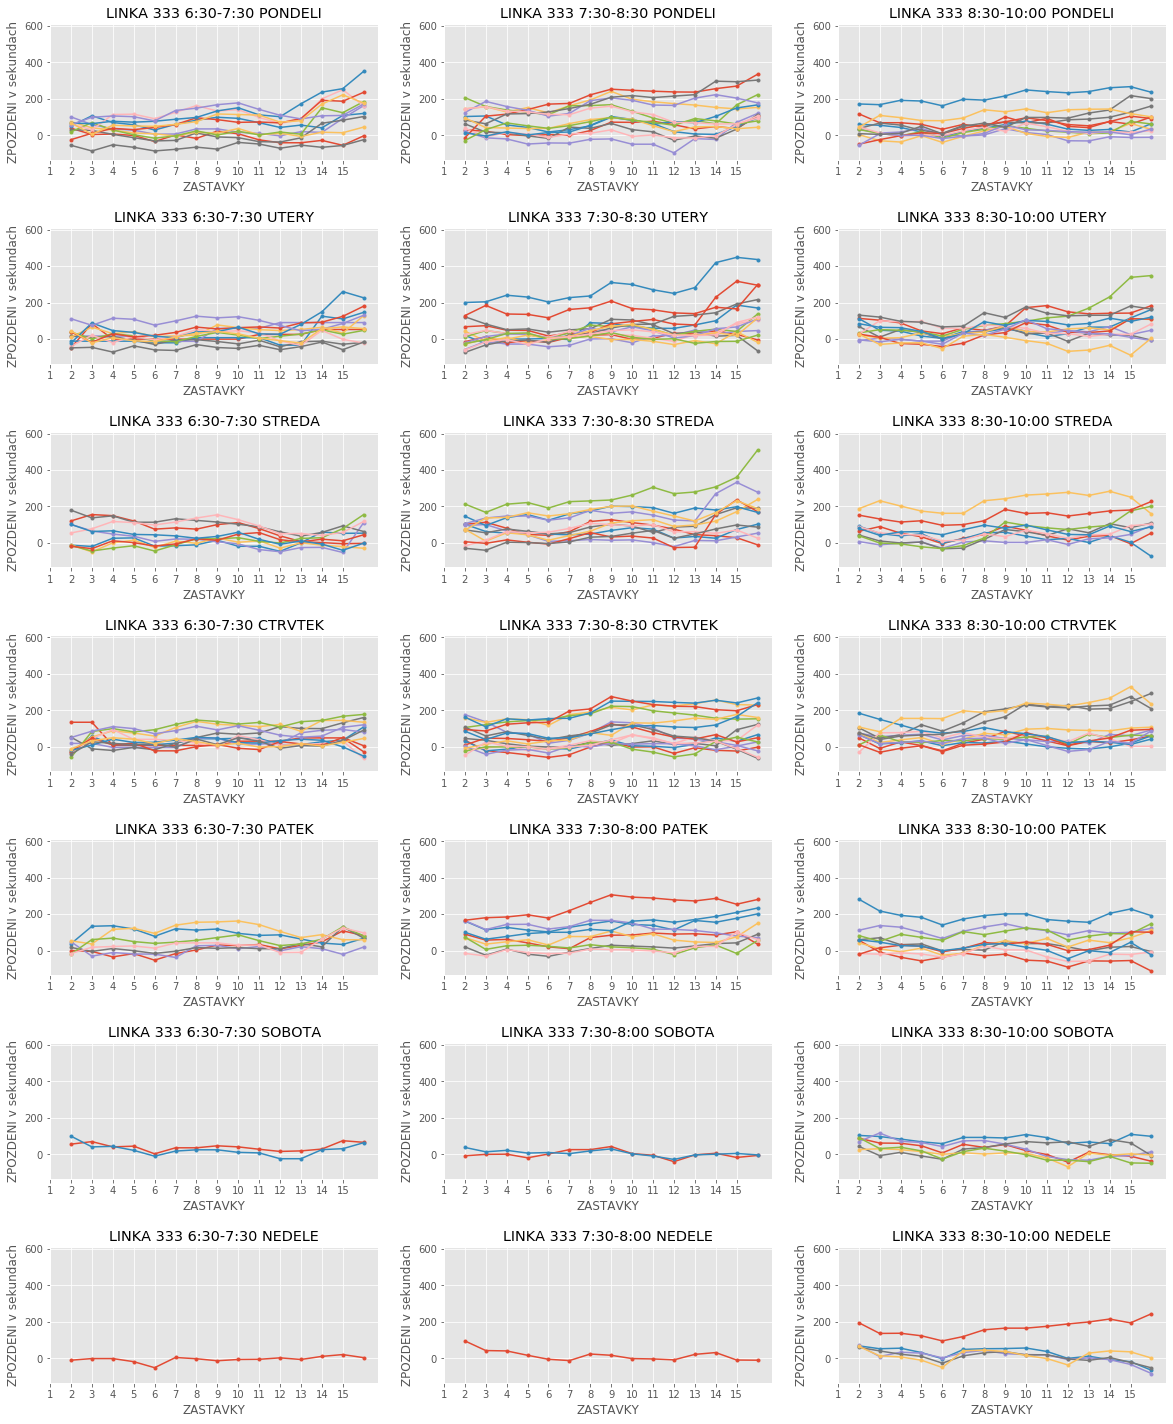

In [12]:
n_days = 7
n_times = 3

fig, axes = plt.subplots(nrows=n_days, ncols=n_times, figsize=(20,25))
min_y = 1000
max_y = -1000

days = [lines1, lines2, lines3]
labels = [
    ['LINKA 333 6:30-7:30 PONDELI','LINKA 333 6:30-7:30 UTERY','LINKA 333 6:30-7:30 STREDA','LINKA 333 6:30-7:30 CTRVTEK','LINKA 333 6:30-7:30 PATEK','LINKA 333 6:30-7:30 SOBOTA','LINKA 333 6:30-7:30 NEDELE'],
    ['LINKA 333 7:30-8:30 PONDELI','LINKA 333 7:30-8:30 UTERY','LINKA 333 7:30-8:30 STREDA','LINKA 333 7:30-8:30 CTRVTEK','LINKA 333 7:30-8:00 PATEK','LINKA 333 7:30-8:00 SOBOTA','LINKA 333 7:30-8:00 NEDELE'],
    ['LINKA 333 8:30-10:00 PONDELI','LINKA 333 8:30-10:00 UTERY','LINKA 333 8:30-10:00 STREDA','LINKA 333 8:30-10:00 CTRVTEK','LINKA 333 8:30-10:00 PATEK','LINKA 333 8:30-10:00 SOBOTA','LINKA 333 8:30-10:00 NEDELE']
]

for i in range(n_times):
    plot_column(n_days, i, days[i], labels[i], axes, min_y, max_y)
    
plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.5, wspace=0.2)